## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# .count counts number of row
df.count()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

c. The number of unique users in the dataset.

In [4]:
# .nunique finds number of unique values
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
# Normalizetion = percentage
# To aggregate number of times each value occured use .value_count
# *100 to move decimals
df['converted'].value_counts(normalize=True) * 100

0    88.034081
1    11.965919
Name: converted, dtype: float64

e. The number of times the `new_page` and `treatment` don't match.

In [10]:
# By using [0] I retrieved only first column
# Use .query to filter dataframe
df.query('landing_page == "new_page" and group == "control"').count()[0]

1928

In [11]:
df.query('landing_page == "old_page" and group == "treatment"').count()[0]

1965

f. Do any of the rows have missing values?

In [12]:
# To find sum of NaN values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [13]:
df2 = pd.read_csv('ab_data.csv')

In [14]:
# control = old_page, treatment = new_page
# Removing all mismatched gorup-landing_page
df2 = df.query("(group == 'control' and landing_page == 'old_page') or (group == 'treatment' and landing_page == 'new_page')")


In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

In [16]:
# control = old_page, treatment = new_page
# Removing all mismatched gorup-landing_page
df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]


0

In [17]:
# Originally 294478. We removed 3,893 rows that were mismatched.
df2.count()

user_id         290585
timestamp       290585
group           290585
landing_page    290585
converted       290585
dtype: int64

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [18]:
# Use .nunique to get count of unique values
df2.user_id.nunique() 

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [19]:
# user_id 773192 was repeated
df2[df2.duplicated(['user_id'])]['user_id'].unique()

array([773192])

c. What is the row information for the repeat **user_id**? 

In [20]:
# user_id 773192 was repeated two times
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [21]:
# Dropped duplicated user_id
df2 = df2.drop_duplicates(['user_id'], keep='first')

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
# Identify column converted probability
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
# Probability of converted among control group
df2.query("group == 'control'").converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
# Probability of converted among treatment group
df2.query("group == 'treatment'").converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [25]:
# # of new_page / # of whole rows Probability of new_page out of whole rows
df2.query("landing_page == 'new_page'").shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

> Based on the proven information form the data, we can't yet conclude that the new treatment page leads to more conversions. The control group with old_page have higher probability in conversion than treatment group with new_page. However, the difference between two is not too noticeable(roughly around 0.002 difference). Since currently new treatment page is 0.002 lower than old control, it is not possible to define that new treatment leads more conversion. 

>In addition to this, the probability that an individual received the new page is about 0.5. This means that it makes even harder to prove that new treatment leads more conversion because given data(df2) has equal probability for each groups. If the given data was more lean toward new treatment (more of treatment group than control group) It could be possible that treatment group leads more conversion than old control group. Based on what I have researched, I figured that I need further more data researching. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

(Null) H0: Pnew ≤  Pold
(Alternative)H1: pnew > Pold
 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [26]:
# Null hypothesis assumption that there is no significant difference for p_new and p_old so we matched pnew and pold
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [27]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [28]:
# To get value of treatment in group column
n_new = df2.query("group == 'treatment'").shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [29]:
n_old = df2.query("group == 'control'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
# Choose between column convert number 1 or 0
# Stimulating 1=0.119, 0=0.881
# Conversion rate under the null means choice 1 under p_new probability
new_page_converted = np.random.choice([1, 0], size = n_new, p = [p_new, (1 - p_new)]).mean()
new_page_converted

0.11986098685568784

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
# Conversion rate under the null choice 1 under p_old probability
old_page_converted = np.random.choice([1, 0], size = n_old, p = [p_old, (1 - p_old)]).mean()
old_page_converted

0.11862411718545644

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
new_page_converted.mean() - old_page_converted.mean()

0.0012368696702313997

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [33]:
# Use for_in range to do for looping
# new_page_converted: 145310, 0.12, size=10000
# old-page_converted: 145274, 0.12, size=10000
# n="number of trials" p="Probability"
# Then append the difference to the p_diffs
p_diffs = []
for _ in range (10000):
    new_page_converted = np.random.choice([1, 0], size = n_new, p = [p_new, (1 - p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size = n_old, p = [p_old, (1 - p_old)]).mean()
    p_diffs.append(new_page_converted - old_page_converted)

In [34]:
low, upper = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)
print(low, upper)

-0.00236289868891 0.0023446896799


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

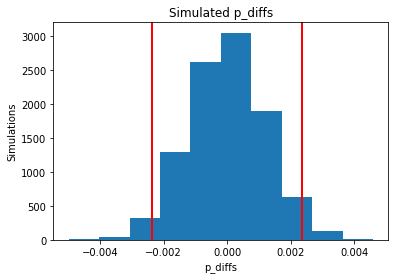

In [37]:
# The differences is mainly clustered in the middle which is around 0.00
# Lower confidence at 0.5 & upper confidence at 99.5
plt.hist(p_diffs);
plt.axvline(x=low, color='r', linewidth=2);
plt.axvline(x=upper, color='r', linewidth=2);
plt.ylabel('Simulations')
plt.xlabel('p_diffs')
plt.title('Simulated p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [38]:
#  Mean of True value
obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
(p_diffs > obs_diff).mean()

0.90980000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> What I just computed in part “J” was p-value. 
The P-value measures strength of the evidence against the null hypothesis using our sample which it means the large P-values suggest that we shouldn't move away from null hypothesis. In another word, the probability of P-value represent if the null hypothesis is correct. (The more p-value is representing that statistic is close to null hypothesis.)

>With significance level of 0.05 or 5%, my P-Value need to be less than 0.05 in order to reject null hypothesis. However, in this case my P-value proves that the control with old_page is equal or bigger than treatment new page with confidence of 90% (0.906). Therefore, I failed to reject the hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [39]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" & converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" & converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]
print(convert_old)
print(convert_new)
print(n_old)
print(n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [40]:
# sm.stats.proportions_ztest helps test for proportions on z test
# Alternative = 'smaller' since n_old is smaller then n_new
# Matching convert old and new and n_old and n_new sequence
z_score, p_value = sm.stats.proportions_ztest((convert_old, convert_new), (n_old, n_new), alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


In [41]:
# Calculating confidence interval
from scipy.stats import norm
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

> Generally z-score measures deviation from the mean. From the data above, I figured out that z-score is 1.31 but since it did not exceed the critical value of 95% confidence interval (which is 1.96) Therefore, I failed to reject null hypothesis. 

>Addionally, I calculated that p_value is very similar to the result from J. This also means that I failed reject null hypothesis. This again proves that there is higher probability of the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>Since we have binary variable (0 or 1), rather than performing linear regression with continuous possible values we should perform logistic regression because it has only a limited number of possible values which is more under categorical variable.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [42]:
# Intercept when doing regression
# Dummies to have categorize in data

df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [43]:
lm = sm.OLS(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Tue, 14 Jul 2020   Prob (F-statistic):              0.190
Time:                        18:36:08   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

> The P-Value associated with ab_page is 0.19 according to the data. As you can compare with part 2, P-value of 0.19 is different from P-value from part 2. The main reason that they have so much difference is because I differently set up a null and alternative hypothesis in part 2 and 3. Instead of using (Null) H0: Pnew ≤ Pold (Alternative)H1: pnew > Pold equation, I used (Null) H0: Pnew = Pold (Alternative) H1: Pold  ≠ Pnew. Part 2 was one-sided test, which it means you can test for an effect in only one direction, whereas part 3 was both sided test. This test was for an effect in both directions. 

> By looking at these two different directions of hypothesis tests, we can have different result. Since two-sided hypothesis test separated into two possible outcomes (into negative and positive), so it could have lower the probability then part 2 p-value probabilities. In another word, part 2 hypothesis test was based on one page vs another page and we focused on which lead better conversion rate whereas part 3 hypothesis test focused on if there is any difference in conversion rate in both pages. So P_value was in larger sided. Therefore, I have the result where part 2 P_value is bigger than part 3 P_value

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>It would be a good idea to consider other factors to add into the regression model. When  many factors are involved, our prediction will be more precise. Adding more factors into our regression can help us to gain deeper insight of our project. It can help us predict what influenced old and new page with conversion rate. It means without adding more factors its hard to find out what else influenced conversion rate. In order to figure out what really influences conversion rate, more factors will definitely be helpful. 

>However, it can produce correlation error. With more factors, multicollinearity could occurs. This occurs when independent variables are correlated. Independent should be independent. Although there are many benefits when adding other factors but there is also a disadvantage like this. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
# Read countries.csv dataset
# Merge data
df_countries = pd.read_csv('countries.csv')
df3 = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [46]:
# Identify unique values for dummies
df_countries.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [47]:
# Drop one column to make 3 column into 2 column
# axis = 1 to drop the whole column
df_countries['intercept']=1
df3[['CA','UK','US']] = pd.get_dummies(df3.country)
df3.drop('CA',axis=1, inplace=True)
df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [58]:
lm = sm.OLS(df3['converted'], df3[['intercept', 'ab_page', 'US', 'UK']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Tue, 14 Jul 2020   Prob (F-statistic):              0.178
Time:                        20:33:48   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1161      0.003     42.036      0.000       0.111       0.122
ab_page       -0.0016      0.001     -1.307      0.191      -0.004       0.001
US             0.0042      0.003      1.514      0.130      -0.001       0.010
UK             0.0053      0.003      1.784      0.074      -0.001       0.011
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> According to the statistical output, I found that country doesn’t have significant impact on conversion rate because P Value is greater than 0.05.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [66]:
df3['ab_UK'] = df3['ab_page'] * df3['UK']
df3['ab_US'] = df3['ab_page'] * df3['US']
lm3 = sm.OLS(df3['converted'], df3[['intercept', 'ab_page', 'UK', 'US', 'ab_UK', 'ab_US']])
results = lm3.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.466
Date:                Tue, 14 Jul 2020   Prob (F-statistic):              0.197
Time:                        22:34:32   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1188      0.004     31.057      0.000       0.111       0.126
ab_page       -0.0069      0.005     -1.277      0.202      -0.017       0.004
UK             0.0012      0.004      0.296      0.767      -0.007       0.009
US             0.0018      0.004      0.467      0.641      -0.006       0.010
ab_UK          0.0080      0.006      1.360      0.174      -0.004       0.020
ab_US          0.0047      0.006      0.845      0.398      -0.006       0.016
==============================================================================
Omnibus:                   125549.436   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414285.945
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## In Conclusion

> In this part of the research, I used the logistic regression model to calculate the P value and to get statistical result of how interaction between page and country could impact on conversion. 

> According to the result we have, even after I added new factor the user’s country did not effect conversion rate due to the fact that they were all exceeding significant level (0.05) which it means based on Type 1 error rate P value was greater than 0.05. Therefore we failed to reject the null hypothesis. 

> Additionally in part II, we also failed to reject the hypothesis due to exceeding P value of 0.906. Therefore we also concluded that old age was better or equally effective than the new page. 

> In conclusion, there is no reason to switch to new page when there is no significant evidence that new page is more effective to raise the conversation rate. At this point we should stay with old page because we failed to reject the null hypothesis. 

## References

https://www.simplypsychology.org/z-score.html

https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

http://www.ltcconline.net/greenl/courses/201/hyptest/hypmean.htm#:~:text=The%20z%2Dscore%20that%20corresponds,05%20is%20%2D1.645.&text=If%20the%20z%2Dvalue%20is,test%20was%20not%20statistically%20significant.

https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/more-significance-testing-videos/v/one-tailed-and-two-tailed-tests


https://statisticsbyjim.com/hypothesis-testing/one-tailed-two-tailed-hypothesis-tests/

<a id='conclusions'></a>
## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [67]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0